# ЛР 3
## Задания:
1. Провести классификацию найденного датасета, методами линеной и логистической регрессий . В формате *Markdown* написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

## Описание датасета:
Датасет удовлетворённости пассажиров их полётом на самолёте.
### Данные:
* id - id пассажира
* <b>Satisfaction_v2 (целевой столбец) - удовлетворённость полётом (satisfied/neutral or dissatisfaction)</b>
* Gender - пол пассажира
* Customer Type - лояльность пассажира (Loyal customer, disloyal customer)
* Age - возраст пассажира на момент полёта
* Type of Travel - цель полёта (Personal Travel/Business Travel)
* Class - класс полёта (Business, Eco, Eco Plus)
* Flight distance - дальность полёта
* Seat comfort - удовлетворённость удобством сидения (0-5)
* Departure/Arrival time convenient - удовлетворённость удобством времени отправления/прибытия (0-5)
* Food and drink - удовлетворённсть едой и напитками (0-5)
* Gate location - удовлетворённость удобством размещения гейтов (0-5)
* Inflight wifi service - наличие и качество WiFi на борту (0 - WiFi отсутствует, 1-5)
* Inflight entertainment - удовлетворённость развлечениям в полёте (0-5)
* Online support - удовлетворённость онлайн поддержкой (0-5)
* Ease of Online booking - удовлетворённость простотой бронирования билетов онлайн (0-5)
* On-board service - удовлетворённость обслуживанием в полёте (0-5)
* Leg room service - удовлетворённость расстоянием между ногами и сидением (0-5)
* Baggage handling - удовлетворённость работы с багажом (0-5)
* Checkin service - удовлетворённость обслуживанием при регистрации (0-5)
* Cleanliness - удовлетворённость чистотой на борту (0-5)
* Online boarding - удовлетворённость простотой получения онлайн талона на посадку (0-5)
* Departure Delay in Minutes - задержка отправления рейса
* Arrival Delay in Minutes - задержка прибытия рейса



In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('satisfaction.xlsx', index_col=0)  

In [2]:
df

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0


Замена текстовых категориальных признаков на числовые

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['satisfaction_v2'] = labelencoder.fit_transform(df['satisfaction_v2'])
df['Gender'] =  labelencoder.fit_transform(df['Gender'])
df['Customer Type'] =  labelencoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = labelencoder.fit_transform(df['Type of Travel'])
df['Class'] =  labelencoder.fit_transform(df['Class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 11112 to 84566
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  int32  
 1   Gender                             129880 non-null  int32  
 2   Customer Type                      129880 non-null  int32  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int32  
 5   Class                              129880 non-null  int32  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              129880

Замена отсутствующих значений задержки прибытия нулями

In [4]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 11112 to 84566
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  int32  
 1   Gender                             129880 non-null  int32  
 2   Customer Type                      129880 non-null  int32  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int32  
 5   Class                              129880 non-null  int32  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              129880

Разбиение на train/test и обучение модели с разными параметрами (Линейная регрессия)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['satisfaction_v2'])
Y = df['satisfaction_v2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.fit_transform(X_test)

under_sampler = RandomUnderSampler(random_state=27)
X_resampled, Y_resampled = under_sampler.fit_resample(X_train, Y_train)

param_grid = {'fit_intercept': [True, False]}

linear_model = LinearRegression()

linear_grid = GridSearchCV(linear_model, param_grid, cv=5)
linear_grid.fit(X_resampled, Y_resampled)

best_params = linear_grid.best_params_
best_fit_intercept = best_params['fit_intercept']
print(f"Лучшие параметры для линейной регрессии: fit intercept: {best_fit_intercept}")


Лучшие параметры для линейной регрессии: fit intercept: True


Оценка точности и отчёт:

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Y_pred = linear_grid.predict(X_test)
rounded_Y_pred = [round(pred) if pred > 0 else 0 for pred in Y_pred]
mae = mean_absolute_error(Y_test, rounded_Y_pred)
mse = mean_squared_error(Y_test, rounded_Y_pred)
r2 = r2_score(Y_test, rounded_Y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R^2: ", r2)

accuracy = accuracy_score(Y_test, rounded_Y_pred)
report = classification_report(Y_test, rounded_Y_pred, zero_division = 1)

print(f'Точность модели: {accuracy}')
print(report)


MAE:  0.16132840570783288
MSE:  0.16132840570783288
R^2:  0.3484170052034258
Точность модели: 0.8386715942921671
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     17571
           1       0.87      0.83      0.85     21393

    accuracy                           0.84     38964
   macro avg       0.84      0.84      0.84     38964
weighted avg       0.84      0.84      0.84     38964



Разбиение на train/test и обучение модели с разными параметрами (Логистическая регрессия)

In [18]:
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['satisfaction_v2'])
Y = df['satisfaction_v2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.fit_transform(X_test)

under_sampler = RandomUnderSampler(random_state=27)
X_resampled, Y_resampled = under_sampler.fit_resample(X_train, Y_train)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

logistic_model = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=1000)

logistic_grid = GridSearchCV(logistic_model, param_grid, cv=5)
logistic_grid.fit(X_resampled, Y_resampled)

best_params = logistic_grid.best_params_
best_C = best_params['C']
best_penalty = best_params['penalty']
print(f"Лучшие параметры для линейной регрессии: C: {best_C}, Penalty: {best_penalty}")

Лучшие параметры для линейной регрессии: C: 0.1, Penalty: l1


Оценка точности и отчёт:

ROC-AUC score: 0.9096944803699012


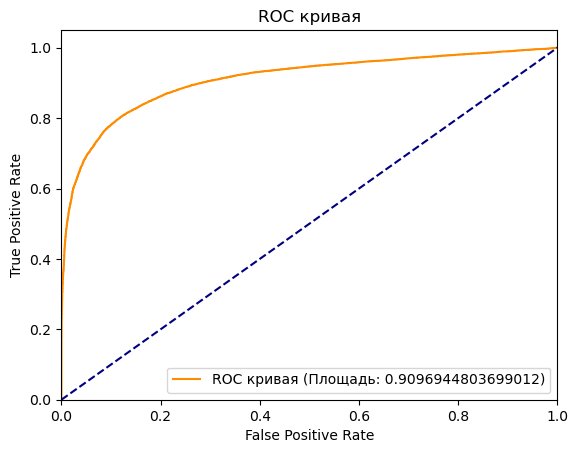

Точность модели: 0.837362693768607
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     17571
           1       0.87      0.83      0.85     21393

    accuracy                           0.84     38964
   macro avg       0.84      0.84      0.84     38964
weighted avg       0.84      0.84      0.84     38964



In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

Y_pred = logistic_grid.predict(X_test)
Y_proba = logistic_grid.predict_proba(X_test)

Y_proba = Y_proba[:, 1]
rocauc_score = roc_auc_score(Y_test, Y_proba)

print(f"ROC-AUC score: {rocauc_score}")

fpr, tpr, treshold = roc_curve(Y_test, Y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label= f'ROC кривая (Площадь: {roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC кривая')
plt.show()

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test,  Y_pred, zero_division = 1)

print(f'Точность модели: {accuracy}')
print(report)